<a href="https://colab.research.google.com/github/sairamadithya/mnist/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import *
from tensorflow.keras.utils import to_categorical
from keras.preprocessing import image
from keras.datasets import mnist

In [12]:
(xtrain,ytrain), (xtest,ytest)= mnist.load_data()
xtrain= xtrain/255.0
xtest= xtest/255.0
x_train= np.expand_dims(xtrain,-1)
x_test= np.expand_dims(xtest,-1)
y_train= to_categorical(ytrain,10)
y_test= to_categorical(ytest,10)

In [3]:
x_train.shape

(60000, 28, 28, 1)

In [4]:
model= Sequential()
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1),padding='same'))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.15))
model.add(BatchNormalization())
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.15))
model.add(BatchNormalization())
model.add(Conv2D(256,kernel_size=(3,3),activation='relu',padding='same'))
model.add(Conv2D(256,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.15))
model.add(BatchNormalization())
model.add(GaussianNoise(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.15))
model.add(BatchNormalization())
model.add(GaussianNoise(0.25))
model.add(Dense(10,activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       1

In [18]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
es= EarlyStopping(monitor='val_loss',patience=2)
mp= ModelCheckpoint('best_model.hdf5',save_best_only=True)
callback=[mp,es]
history= model.fit(x_train,
                   y_train,
                   epochs=20,
                   steps_per_epoch=3750,
                   batch_size=16,
                   validation_data=(x_test,y_test),
                   callbacks=callback)

Epoch 1/20
3750/3750 [==============================] - 26s 7ms/step - loss: 0.2337 - accuracy: 0.9290 - val_loss: 0.0427 - val_accuracy: 0.9861
Epoch 2/20
3750/3750 [==============================] - 24s 6ms/step - loss: 0.0590 - accuracy: 0.9823 - val_loss: 0.0291 - val_accuracy: 0.9909
Epoch 3/20
3750/3750 [==============================] - 22s 6ms/step - loss: 0.0557 - accuracy: 0.9830 - val_loss: 0.0240 - val_accuracy: 0.9929
Epoch 4/20
3750/3750 [==============================] - 24s 6ms/step - loss: 0.0404 - accuracy: 0.9878 - val_loss: 0.0249 - val_accuracy: 0.9923
Epoch 5/20
3750/3750 [==============================] - 23s 6ms/step - loss: 0.0337 - accuracy: 0.9896 - val_loss: 0.0224 - val_accuracy: 0.9937
Epoch 6/20
3750/3750 [==============================] - 23s 6ms/step - loss: 0.0275 - accuracy: 0.9914 - val_loss: 0.0186 - val_accuracy: 0.9940
Epoch 7/20
3750/3750 [==============================] - 22s 6ms/step - loss: 0.0237 - accuracy: 0.9926 - val_loss: 0.0157 - val_ac

In [21]:
model.evaluate(x_train,y_train)

1875/1875 [==============================] - 8s 4ms/step - loss: 0.0039 - accuracy: 0.9986


[0.003918918780982494, 0.9986333250999451]

In [23]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0203 - accuracy: 0.9949


[0.020302770659327507, 0.9948999881744385]

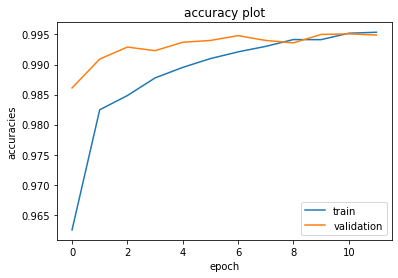

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuracy plot')
plt.xlabel('epoch')
plt.ylabel('accuracies')
plt.legend(['train','validation'])

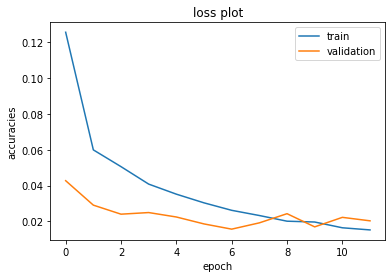

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss plot')
plt.xlabel('epoch')
plt.ylabel('accuracies')
plt.legend(['train','validation'])

The uploaded image contains the number: 8
THANK YOU FOR USING THIS PROJECT. HOPE THIS HELPS!!!!


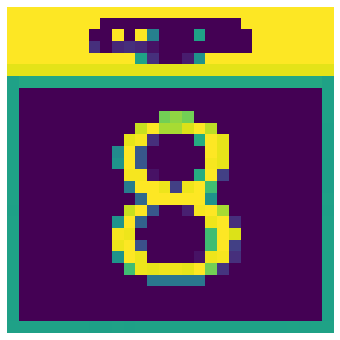

In [41]:
from keras.preprocessing import image
img= image.load_img('test-8.png',color_mode="grayscale",target_size=(28,28))
imag= image.img_to_array(img)
image= imag.reshape(1,28,28,1)
image= image/255.0
ypred = model.predict(image)
ypred
output=np.argmax(ypred)
def plot_img(img):
  plt.figure(figsize=(6,6))
  plt.imshow(img)  
  plt.title('')
  plt.axis('off')
plot_img(img)
print('The uploaded image contains the number:',output)
print('THANK YOU FOR USING THIS PROJECT. HOPE THIS HELPS!!!!')